# Getting and Knowing your Data

### Step 1. Import the necessary libraries and check for its version

In [1]:
import pandas as pd
print(pd.__version__)

1.3.4


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
d = pd.read_table(path)
d

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable.
### Data Ingestion

### Step 4. See the first 5 entries

### Step 5. What is the number of observations in the dataset?
### How many rows and columns?
#### Print the column names

In [ ]:
# Solution 1

In [ ]:
# Solution 2


### Step 6. Slicing between rows

### Step 7. Getting Subset of DataFrame/ Series

#### Hint : Learn about .iloc operator

### Step 8. Check for duplicates and drop them

In [5]:
d[d.duplicated()].shape

(59, 5)

In [7]:
d = d.drop_duplicates()
d.shape

(4563, 5)

### Step 9. Which was the most-ordered item? 
### Plot a graph for the same. Put the text on top.
### Use List comprehension for veg/non veg

In [10]:
z=d['item_name'].value_counts().head()
z

Chicken Bowl           717
Chicken Burrito        546
Chips and Guacamole    474
Steak Burrito          365
Canned Soft Drink      290
Name: item_name, dtype: int64

<AxesSubplot:>

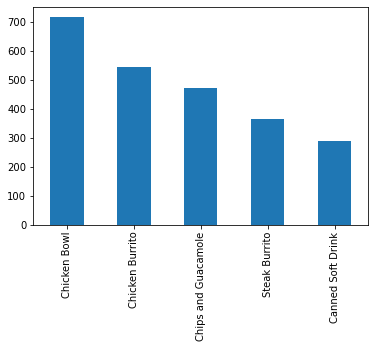

In [9]:
d['item_name'].value_counts().head().plot(kind='bar')

In [ ]:
# matplotlib

In [11]:
type(z)

pandas.core.series.Series

In [20]:
# List comprehension
c = ['r' if "Chicken" in i or "Steak" in i else 'g' for i in z.index]

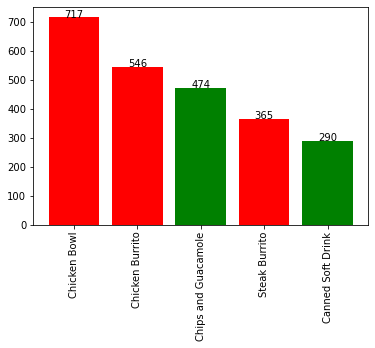

In [22]:
import matplotlib.pyplot as plt
plt.bar(z.index,z,color=c)
plt.xticks(rotation=90)
for i in range(5):
    plt.text(i,z[i],z[i],ha='center')
plt.show()

### Step 10. For the most-ordered item, how many items were ordered?

### Step 11. What was the most ordered item in the choice_description column?

In [23]:
d['choice_description'].value_counts().head(1)

[Diet Coke]    133
Name: choice_description, dtype: int64

### Step 12. How many items were orderd in total?

In [24]:
d['quantity'].sum()

4913

### Step 12a. Get the details of highest ordered item
#### Hint : Use Conditions

In [25]:
d[d['quantity']==d['quantity'].max()]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25


In [26]:
d['quantity'].max()

15

dtype('O')

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [28]:
d['item_price'].dtype

dtype('O')

#### Step 13.b. Change the type of item price to float

In [29]:
d['item_price'] = d['item_price'].str.replace('$','').astype(float)

C:\Users\hp\AppData\Local\Temp/ipykernel_13648/3757484177.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  d['item_price'] = d['item_price'].str.replace('$','').astype(float)
C:\Users\hp\AppData\Local\Temp/ipykernel_13648/3757484177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['item_price'] = d['item_price'].str.replace('$','').astype(float)


#### Step 13.c. Check the item price type

In [30]:
d['item_price'].dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [31]:
d['revenue']=d['quantity']*d['item_price']

C:\Users\hp\AppData\Local\Temp/ipykernel_13648/1177849126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['revenue']=d['quantity']*d['item_price']


In [32]:
d['revenue'].sum()

38914.11

### Step 15. How many orders were made in the period?

In [33]:
d['order_id'].value_counts().count()

1834

### Step 16. What is the average revenue amount per order?

In [34]:
38914.11/1834

21.218162486368595

### Step 17. How many different items are sold?

In [35]:
d['item_name'].value_counts().count()

50

###Step 18 : How many orders have revenue less than 10 dollars


In [36]:
d['revenue']<10

0        True
1        True
2        True
3        True
4       False
        ...  
4617    False
4618    False
4619    False
4620     True
4621     True
Name: revenue, Length: 4563, dtype: bool

In [37]:
d[d['revenue']<10].count()['revenue']

3386

###Step 19 : Plot a graph of Revenue with rolling mean window as 100

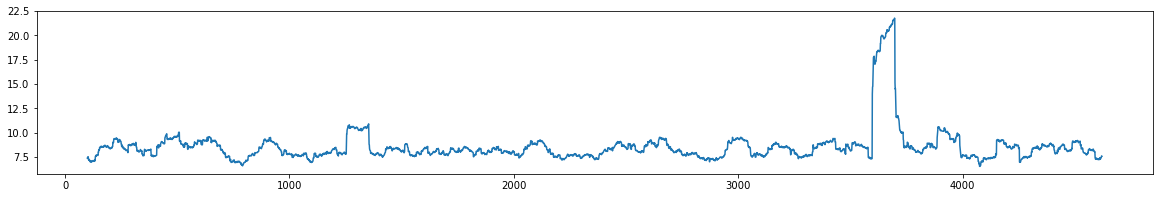

In [38]:
plt.figure(figsize=(20,3))
plt.plot(d['revenue'].rolling(100).mean())
plt.show()

### Step 20 : Take the different revenue, divide it into low, medium and high region and then plot pie chart